In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./data/{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    ranks = ranks[ranks['creatorName'].str.contains('GG')]
    if print_info:
        ranks.info()
    return ranks


In [139]:
NAMES = ['MUN', 'THR', 'OGR', 'SHM', 'BRW', 'WRL']

def collect_scores(ranks):
    by_units = []
    for name in NAMES:
        units = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
        units.reset_index(drop=True, inplace=True)
        by_units.append(units)

    unit_scores = pd.concat(by_units,
        ignore_index=True, axis=1)
    unit_scores.columns = NAMES
    return unit_scores

def print_score_data(unit_scores):
    result = []
    for name in NAMES:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME -- MEAN   --   MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <7.2f} -- {line[2]:.2f}')

def boxplot_score(unit_scores, vert_size=6):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, vert_size))
    sns.boxplot(data=unit_scores)

NAME -- MEAN   --   MED
WRL -- 2494.59 -- 2480.29
SHM -- 1364.82 -- 1203.23
THR -- 793.56  -- 789.42
BRW -- 567.39  -- 620.46
MUN -- 374.26  -- 516.49
OGR -- 10.07   -- -37.20


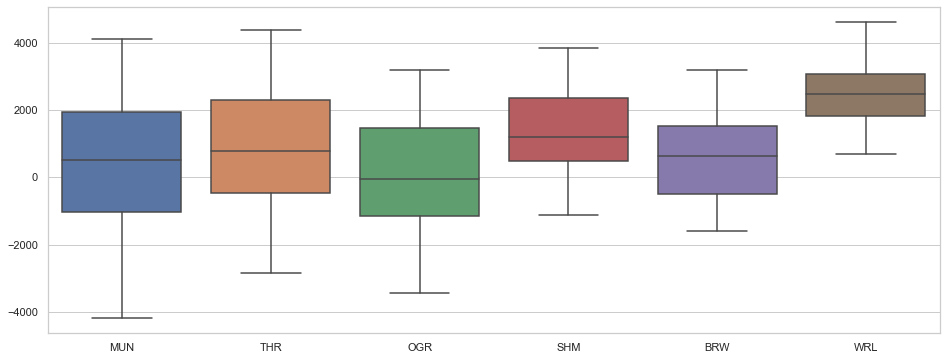

In [140]:
# Version 0.8.23
# team by 3
# C point without assault
front_team3_v0 = take_and_clean('rankingsC', '-C-', False)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 56 to 273
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
WRL -- 2167.11 -- 2182.07
SHM -- 1300.05 -- 1322.52
BRW -- 1281.19 -- 1365.39
THR -- 796.32  -- 1159.64
OGR -- 608.93  -- 1174.93
MUN -- 228.45  -- 777.71


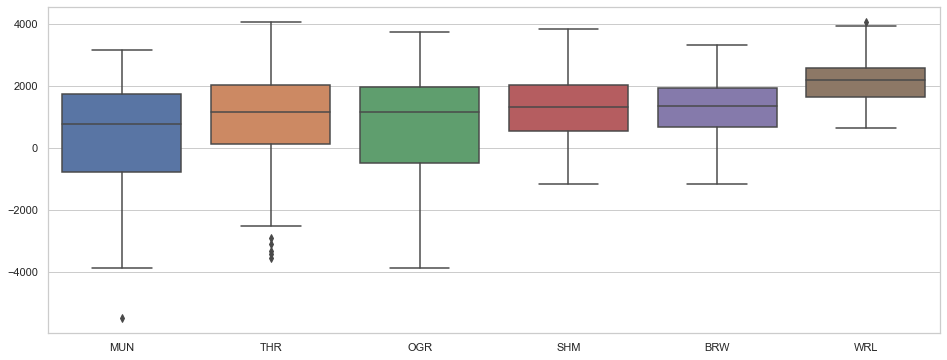

In [141]:
# Version 0.8.23.a
# team by 3
# ALT point with assault
front_team3_v0 = take_and_clean('rankingsV23A', 'V23A', True)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 56 to 1353
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  1296 non-null   object 
 1   totalScore   1296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.4+ KB
NAME -- MEAN   --   MED
SHM -- 1893.37 -- 1922.44
BRW -- 1797.52 -- 1824.11
THR -- 1604.41 -- 1697.73
OGR -- 1577.52 -- 1650.05
WRL -- 1575.66 -- 1585.00
MUN -- 1349.86 -- 1422.29


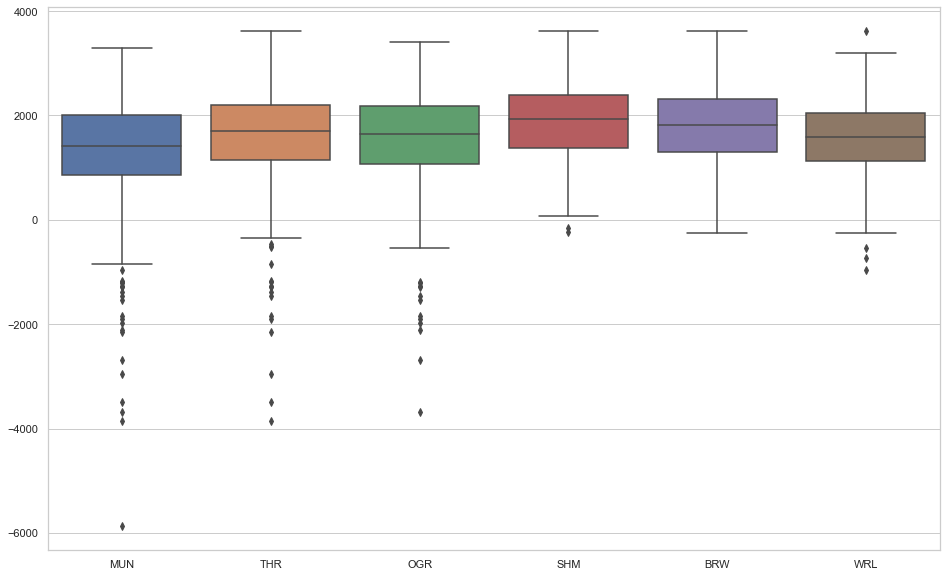

In [142]:
# Version 0.8.23.b
# team by 4
# ALT point with assault
front_team4_v0 = take_and_clean('rankings23V4', '23B4', True)
front_team4_v0_scores = collect_scores(front_team4_v0)
print_score_data(front_team4_v0_scores)
boxplot_score(front_team4_v0_scores, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 57 to 297
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
SHM -- 1861.57 -- 1877.05
BRW -- 1824.42 -- 1866.27
OGR -- 1316.34 -- 1455.41
THR -- 1313.47 -- 1562.17
WRL -- 1301.15 -- 1345.16
MUN -- 925.75  -- 1237.03


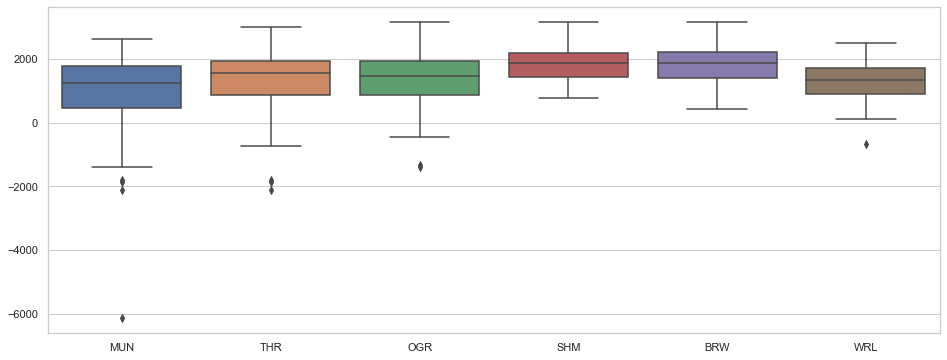

In [143]:
# Version 0.8.23.c
# team by 3
# ALT point with assault
front_team3_v0 = take_and_clean('rankings23B3', '23B3', True)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 79 to 297
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   creatorName  216 non-null    object 
 1   totalScore   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
NAME -- MEAN   --   MED
BRW -- 1846.60 -- 1870.13
WRL -- 1713.27 -- 1757.44
SHM -- 1345.93 -- 1419.21
THR -- 1191.55 -- 1435.16
OGR -- 1169.04 -- 1441.05
MUN -- 739.20  -- 1118.34


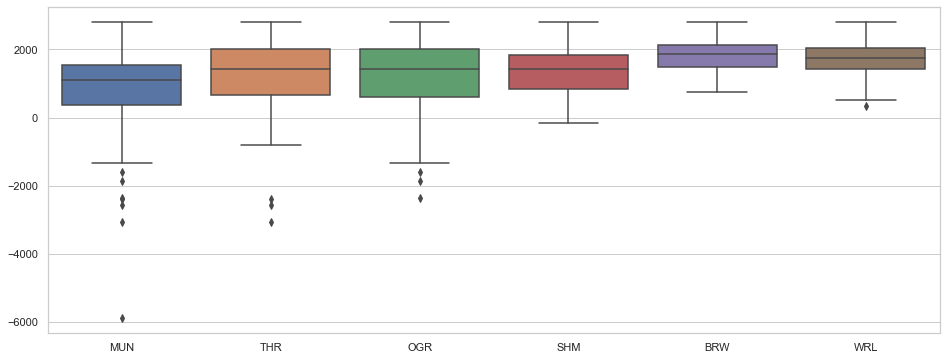

In [145]:
# Version 0.8.23.d
# team by 3
# ALT point with assault
# weakened shamans (damage)
# increased munchkin and warlock damage
front_team3_v0 = take_and_clean('rankings23D3', '23D3', True)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores, 6)

In [147]:
# Version 0.8.23.e
# team by 4
# ALT point with assault
# brawler - maxHealth: 360 -> 350
# munchkin - maxHealth: 100 -> 110
# ogre attackDamage: 25 -> 27
# shaman maxHealth: 100 -> 110
front_team_v0 = take_and_clean('rankings23E4', '23E4', True)
front_team_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team_v0_scores)
boxplot_score(front_team_v0_scores, 10)